In [ ]:
!pip install pycaret

In [ ]:
pip list

In [4]:
#Modeling flow
#1. Load your data
#Load the 'pandas' library
import pandas as pd

from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))



#Retrieve the first 5 obs
df.head(5)

#head(df,2)    #R function-oriented
#df.head(2)    #Object oriented

Saving data.csv to data (1).csv


,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Age,Sex,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,BP,11.28,34,F,Chronic,Thyroid
1,No_BP,9.75,54,F,No_chronic,No_thyroid
2,BP,10.79,70,M,Chronic,No_thyroid
3,No_BP,11.00,71,M,Chronic,No_thyroid
4,BP,14.17,52,M,No_chronic,No_thyroid


In [5]:
#Get dummies for the Cond
df_dummies = pd.get_dummies(df, columns = ['Blood_Pressure_Abnormality','Sex','Chronic_kidney_disease','Adrenal_and_thyroid_disorders'], drop_first = False)

In [24]:
df1=df_dummies


df1.rename(columns = {'Level_of_Hemoglobin':'Hemoglobin',
                      'Blood_Pressure_Abnormality_BP':'BP',
                      'Blood_Pressure_Abnormality_No_BP':'No_BP',
                      'Chronic_kidney_disease_Chronic':'ChronicKidney',
                      'Chronic_kidney_disease_No_chronic':'No_ChronicKidney',
                      'Adrenal_and_thyroid_disorders_No_thyroid':'No_AdrenalThyroid',
                      'Adrenal_and_thyroid_disorders_Thyroid': 'Adrenal_Thyroid'}, inplace=True)

df1.head(5)

,Hemoglobin,Age,BP,No_BP,Sex_F,Sex_M,ChronicKidney,No_ChronicKidney,No_AdrenalThyroid,Adrenal_Thyroid
0,11.28,34,1,0,1,0,1,0,0,1
1,9.75,54,0,1,1,0,0,1,1,0
2,10.79,70,1,0,0,1,1,0,1,0
3,11.00,71,0,1,0,1,1,0,1,0
4,14.17,52,1,0,0,1,0,1,1,0


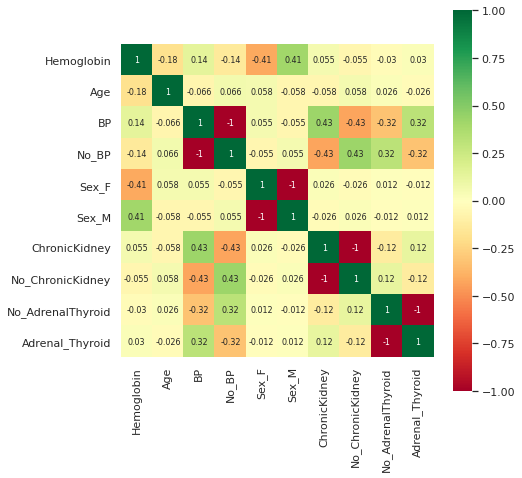

In [39]:
#Re-running correlations
import seaborn as sb
sb.set(rc={'figure.figsize':(7,7)})
sb.heatmap(df1.corr(), annot=df1.corr(), cmap = 'RdYlGn',square=True,annot_kws={"size": 8})